In [2]:
# df_train.drop('id', 1, inplace=True)

# df_train_cat = df_train.select_dtypes(include=["object"])
# df_train_num = df_train.select_dtypes(exclude=["object"])

# df_train_num = df_train_num.join(df_train**2, lsuffix="_sqr")
# df_train_num = df_train_num.join(df_train**3, lsuffix="_cube")
# df_train_num = df_train_num.join(sqrt(df_train**(1/2)), lsuffix="_1/2")
# df_train_num = df_train_num.join(df_train**(1/3), lsuffix="_1/3")
# df_train_num = df_train_num.join(np.log1p(df_train), lsuffix="_log")

In [3]:
import sys
sys.path.append('/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df_train = pd.read_csv('train.csv').fillna(np.nan)
df_extra = pd.read_csv('macro.csv')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
list(df_train.columns)

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

In [5]:
corr = pd.DataFrame()
num = df_train.select_dtypes(exclude=["object"])
corr['1st'] = abs(num.corr()['price_doc'])
corr['2nd'] = abs((num**2).corr()['price_doc'])
corr['3nd'] = abs((num**3).corr()['price_doc'])
corr['1/2'] = abs((num**0.5).corr()['price_doc'])
corr['1/3'] = abs((num**0.333).corr()['price_doc'])
corr['log'] = abs(np.log1p(num).corr()['price_doc'])
corr['1/(x+1)'] = abs((1/(1+num)).corr()['price_doc'])
corr['1/(x^1/2+1)'] = abs((1/(1+num**(1/2))).corr()['price_doc'])
corr

,1st,2nd,3nd,1/2,1/3,log,1/(x+1),1/(x^1/2+1)
id,0.121203,0.057611,0.020568,0.138935,0.140398,0.135022,0.012153,0.089616
full_sq,0.341840,0.010047,0.008462,0.536818,0.524681,0.460079,0.086454,0.295113
life_sq,0.165606,0.001650,0.004488,0.374997,0.352255,0.275767,0.031471,0.123843
floor,0.117447,0.078728,0.010032,0.123132,0.121911,0.115241,0.068683,0.095738
max_floor,0.094386,0.077464,0.005228,0.076496,0.061621,0.058052,0.008433,0.011038
material,0.064047,0.058303,0.016150,0.050288,0.043514,0.024380,0.009858,0.003296
build_year,0.002161,0.000137,0.012687,0.018929,0.043507,0.036393,0.011240,0.011441
num_room,0.476337,0.287895,0.013516,0.479524,0.462048,0.425830,0.201716,0.311425
kitch_sq,0.028718,0.003711,0.004709,0.156951,0.148046,0.129040,0.010608,0.041257
state,0.121303,0.043792,0.012132,0.110185,0.100210,0.079267,0.013712,0.028283


In [6]:
corr[corr['1/(x^1/2+1)'] > corr['log']]

,1st,2nd,3nd,1/2,1/3,log,1/(x+1),1/(x^1/2+1)
school_quota,0.014012,0.024282,0.008792,0.002744,0.000459,0.005209,0.009627,0.008809
culture_objects_top_25_raion,0.044296,0.021904,0.004857,0.077314,0.090498,0.056030,0.037790,0.062144
build_count_wood,0.042486,0.028456,0.005720,0.026169,0.014067,0.004313,0.006234,0.005542
build_count_frame,0.030285,0.026789,0.006972,0.004371,0.009540,0.007430,0.008383,0.015933
build_count_panel,0.020059,0.034938,0.007891,0.022430,0.047550,0.057707,0.021024,0.059787
build_count_foam,0.010737,0.007010,0.005543,0.003330,0.010424,0.006890,0.017109,0.017882
build_count_mix,0.033005,0.031373,0.008264,0.004398,0.007850,0.008158,0.003595,0.010259
ID_metro,0.052824,0.061578,0.013342,0.024692,0.013134,0.007154,0.023989,0.023390
green_part_500,0.054191,0.034296,0.010493,0.015701,0.008119,0.014678,0.033943,0.040613
big_church_count_500,0.026166,0.002826,0.003998,0.073038,0.087101,0.057217,0.037980,0.062349


In [7]:
num = df_train.select_dtypes(exclude=["object"])
np.corrcoef(num.iloc[0],num.iloc[2])

array([[ nan,  nan],
       [ nan,  nan]])

In [8]:
print(df_train.select_dtypes(include=["object"]).columns)
print(" ")
print(df_train.select_dtypes(exclude=["object"]).columns[:])

Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')
 
Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)


In [9]:
corr = df_train.select_dtypes(exclude = ['object']).corr()

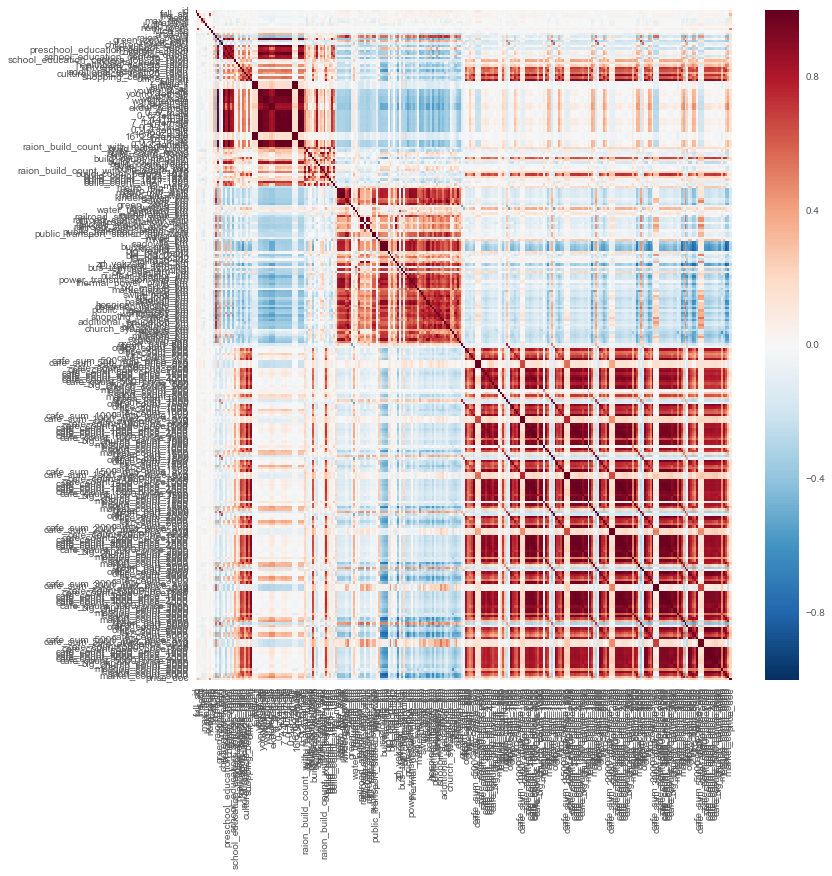

In [10]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=False)

A lot of related varible have same correlation, need to filter them out and clean it.

In [11]:
def find_similar_feature(df, output_class_name, threshold=0.75):
    df = pd.DataFrame(df)
    corr_with_out = df[output_class_name]

    df.drop(output_class_name, 1, inplace=True)
    df.drop(output_class_name, 0, inplace=True)

    row_count = np.size(df, axis=0)
    col_count = np.size(df, axis=1)
    
    if row_count != col_count:
        raise ValueError('Data is Unsymmetric')
        
    drop_list = pd.DataFrame()
    
    for i in range(0, row_count):
        for j in range(0, i):
            if df.iloc[i,j] >= threshold:
                if(abs(corr_with_out[i]) >= abs(corr_with_out[j])):
                    drop_list = drop_list.append([df.columns[i]])
                else:
                    drop_list = drop_list.append([df.columns[j]])
#                 print(df.columns[i], df.index[j],"are simmilar", df.iloc[i,j], "with ", corr_with_out[i])
                
    return drop_list.drop_duplicates()[0]

drop_list = find_similar_feature(corr, "price_doc", threshold=0.65)

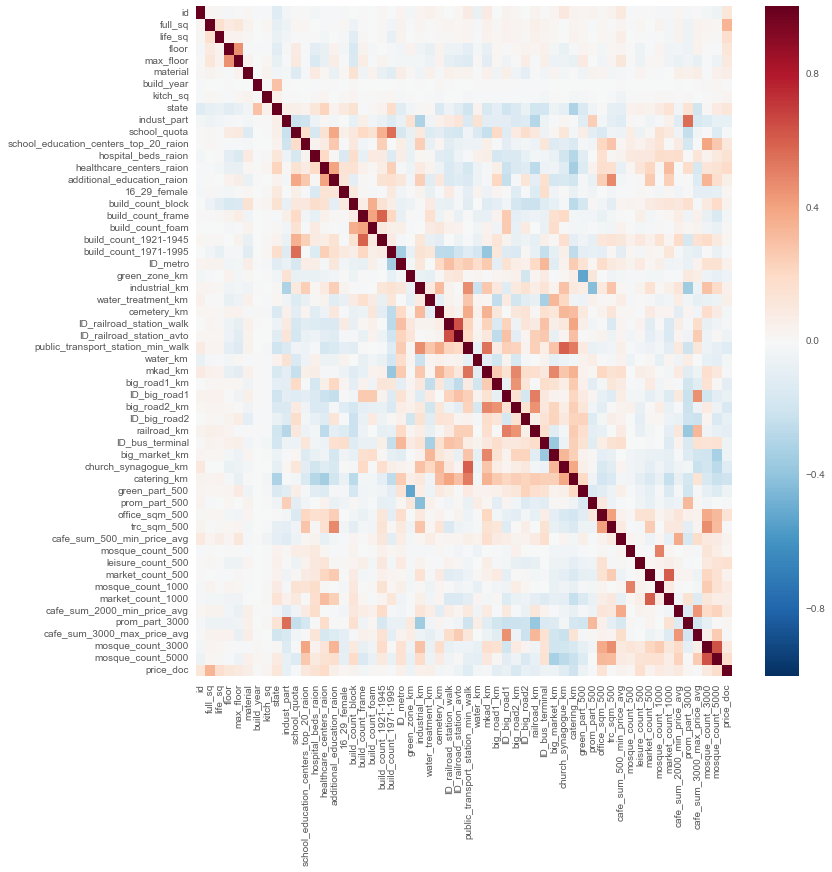

In [12]:
df_train.drop(drop_list, 1, inplace=True)

corr = df_train.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=False)

In [13]:
def remove_col_with_missing_values(df, precent_greater_than=0.66):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([percent], axis=1, keys=['Percent'])
    return missing_data[missing_data['Percent'] >= precent_greater_than].index
    
remove_col_with_missing_values(df_train)

Index([], dtype='object')

In [14]:
def fill_missing_data_with_suitable(df):
    # missing value fill with mode in case of Categorical feature
    for i in df_train.select_dtypes(include=['object']).columns:
        df[i] = df[i].fillna(df[i].value_counts()[0])
    
    # missing value fill with mean in case of Numerical column
    for i in df_train.select_dtypes(exclude=['object']).columns:
        df[i] = df[i].fillna(df[i].mean())
    
    return df


df_train = fill_missing_data_with_suitable(df_train)
# fill_missing_data_with_suitable(df_train)

In [15]:
# extreme outliers

to_drop = pd.Series([13546, 3527, 9646, 22785, 20722
                    , 21734, 21852, 25940, 10368, 11520
                    , 13117, 21415, 28734
                    , 10089
                    , 11701])
# df_train = df_train.drop([], axis=0)

In [27]:
def categorical_feature_density(df, output_class,show_head=20,threshold=50,print_result=True):
    data_rows = np.size(df,0)
    out_col_name = []
    for i, col in enumerate(df.columns):
        grouped = df.groupby(col)[output_class]
        
        output_df = df[col].value_counts()
        output_df = pd.DataFrame({'Count #':output_df, 'Percent %':(output_df/data_rows)*100})
        output_df = output_df.join(grouped.mean(),lsuffix="_mean")
        
        if output_df.iloc[0,1] > threshold:
            out_col_name += [col]
            if print_result and 7 > np.size(output_df,0) > 2:
                print("-------------------------------------------------------------------------")
                print("| Feature Density Distribution of (",col,") --- ",i)
                print("-------------------------------------------------------------------------")
                print(output_df.head(show_head))
                print("==========================================================================")
                print(output_df.corr()[output_class])
                print(" ")
                print(" ")
#                   plt.figure(i)
#                   plt.scatter(df[col], df[output_class])
#                   plt.title(output_df.head(show_head))
#                   plt.xlabel(col)
#                   plt.ylabel(output_class)
                
    return out_col_name

to_one_hot = categorical_feature_density(df_train, output_class='price_doc', print_result=True)

-------------------------------------------------------------------------
| Feature Density Distribution of ( school_education_centers_top_20_raion ) ---  11
-------------------------------------------------------------------------
          Count #  Percent %  price_doc
0.000000    27334  89.704965  15.595864
0.693147     2932   9.622264  15.700489
1.098612      205   0.672771  16.123793
Count #     -0.719619
Percent %   -0.719619
price_doc    1.000000
Name: price_doc, dtype: float64
 
 
-------------------------------------------------------------------------
| Feature Density Distribution of ( build_count_foam ) ---  18
-------------------------------------------------------------------------
          Count #  Percent %  price_doc
0.000000    24065  78.976732  15.652529
0.153220     4991  16.379508  15.406029
0.693147      969   3.180073  15.541187
2.484907      262   0.859834  15.674460
1.098612      184   0.603853  15.765432
Count #      0.008372
Percent %    0.008372
price_doc  

One Hot seperation not necessary

In [17]:
# Normalization
from scipy.stats import skew

skewed = df_train.select_dtypes(exclude=['object']).apply(lambda x: skew(x.astype(float)))
print(skewed[abs(skewed) > 0.75])
skewed = skewed[abs(skewed) > 0.75].index
df_train[skewed] = np.log1p(df_train[skewed])

full_sq                                   88.546963
life_sq                                  135.171312
floor                                      1.038984
max_floor                                  0.763784
material                                   2.026827
build_year                               174.541717
kitch_sq                                  80.862518
state                                      3.478017
indust_part                                1.124245
school_quota                               2.069815
school_education_centers_top_20_raion      3.028816
hospital_beds_raion                        1.810681
healthcare_centers_raion                   1.000346
additional_education_raion                 2.528531
16_29_female                               4.212244
build_count_block                          1.561517
build_count_frame                          4.411959
build_count_foam                           9.879595
build_count_1921-1945                      3.957911
ID_metro    

In [18]:
df_train = pd.get_dummies(df_train)

In [19]:
from sklearn import model_selection, preprocessing
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [21]:
X = np.array(df_train.drop(["price_doc"], 1))
X = preprocessing.scale(X)
y = np.array(df_train["price_doc"])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X[0:10000], y[0:10000], test_size=0.5)

In [28]:
# import xgboost as xgb

# regr = xgb.XGBRegressor()
# #                  colsample_bytree=0.2,
# #                  gamma=0.0,
# #                  learning_rate=0.05,
# #                  max_depth=6,
# #                  min_child_weight=1.5,
# #                  n_estimators=7200,                                                                  
# #                  reg_alpha=0.9,
# #                  reg_lambda=0.6,
# #                  subsample=0.2,
# #                  seed=42,
# #                  silent=1

# regr.fit(X_train, y_train)

# y_train_ = regr.predict(X_train)
# print("Training Error: ",rmse(y_train,y_train_))

# y_test_ = regr.predict(X_test)
# print("Testing Error: ",rmse(y_test,y_test_))

In [29]:
clf = LinearRegression()
clf.fit(X_train, y_train)

y_train_ = clf.predict(X_train)
print("Training : ",rmse(y_train,y_train_))

y_test_ = clf.predict(X_test)
print("Testing : ",rmse(y_test,y_test_))



Training :  0.486785374667
Testing :  4.1769402163e+13


In [ ]:
clf.coef